### **Chapter 22:** $\underline{\textbf{ORDINARY DIFFERENTIAL EQUATIONS (ODES)}}$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from functools import partial

**Q2.**  The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The **Lorenz** equations can be written as follows:
$$ \frac{dx}{dt} = \sigma(y-x),$$
$$ \frac{dy}{dt} = x(\rho-z)-y,$$
$$ \frac{dz}{dt} = xy - \beta z,$$

where $x,$ $y,$ and $z$ represent the position in three dimensions, and $σ,$ $ρ,$ and $β$ are scalar parameters of the system. Read more about the **Lorenz** attractor on Wikipedia1 or more details in the book *“Viability Theory– New Directions.”* Write a function $my\_lorenz(t,S,sigma,rho,beta),$ where $t$ is a scalar denoting time, $S$ is a $3D$ array denoting the position $(x,y,z),$ and $sigma,$ $rho,$ and $beta$ are strictly positive scalars representing $σ,$ $ρ,$ and $β.$ The output argument $dS$ should be the same size as $S.$

In [2]:
def my_lorenz(t, S, sigma, rho, beta):
    x, y, z = S
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    return np.array([dx, dy, dz])

s = np.array([1, 2, 3])
dS = my_lorenz(0,s, 10, 28, 8/3)
dS

array([10., 23., -6.])

**Q3.**  Write a function $my\_lorenz\_solver(t\_span,s0,sigma,rho,beta)$ solves the **Lorenz** equations using $solve\_ivp,$ the function returns. The input argument $t\_span$ should be a list of the form $[t_0,t_f],$ where $t_0$ is the initial time, and $t_f$ is the final time of consideration. The input argument $s_0$ should be a $3D$ array of the form $[x_0,y_0,z_0],$ where $(x_0,y_0,z_0)$ represents an initial position. Finally, the input arguments $sigma,$ $rho,$ and $β$ are the scalar parameters $σ,$ $ρ,$ and $β$ of the **Lorenz** system. The output argument $T$ should be an array of times given as the output argument of $solve_ivp.$ The output arguments, $X,$ $Y,$ and $Z$ should be the numerically integrated solution produced from $my\_lorenz$ in the problem **2** and $solve\_ivp.$

In [3]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    times = np.linspace(t_span[0], t_span[1], 5000)
    sol = solve_ivp(my_lorenz, t_span, s0, args=(sigma, rho, beta), t_eval =times)
    T = sol.t
    X, Y, Z = sol.y
    return [T, X, Y, Z]

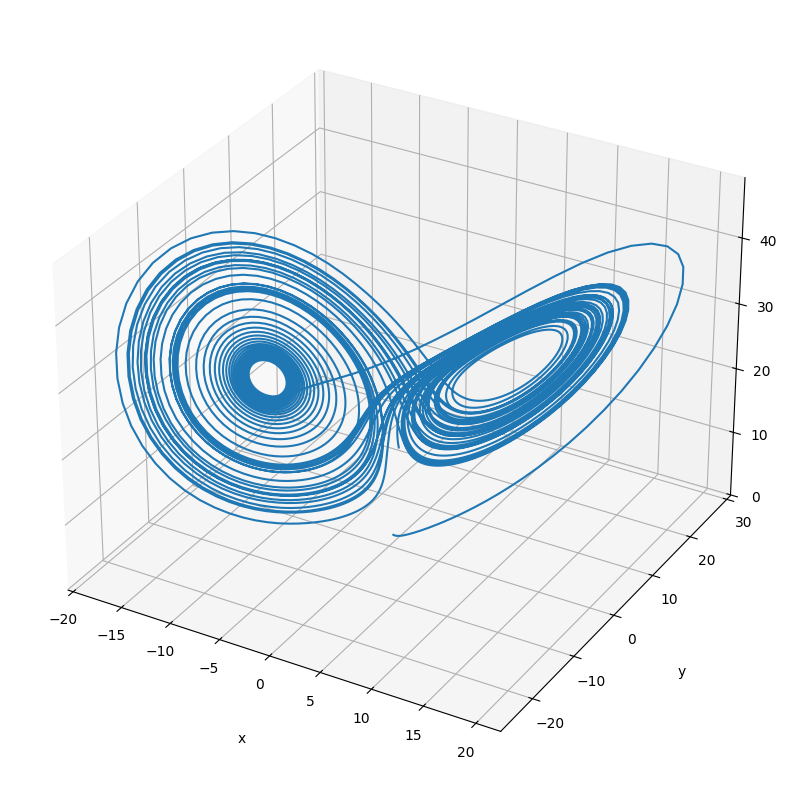

In [4]:
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])
[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.grid()
ax.plot3D(X, Y, Z)
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)
plt.show()

**Q4.** Consider the following model of a **mass–spring–damper(MSD)** system in one dimension. In this figure, $m$ denotes the mass of the block, $c$ is called the damping coefficient, and $k$ is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications, such as shock observers and structural systems.


The relationship between acceleration, velocity, and displacement can be expressed by the following MSD differential equation: $$m\ddot{x} + c\dot{x} + kx = 0,$$
which can be rewritten as $$\ddot{x} = \frac{−(c\dot{x} +kx)}{m}.$$

Let the state of the system be denoted by the vector $S =[x;v],$ where $x$ is the displacement of the mass from its resting configuration, and $v$ is its velocity. Rewrite the **MSD** equation as a first-order differential equation in terms of the state, $S.$ In other words, rewrite the **MSD** equation as $\frac{dS}{dt} = f(t,S).$ Write a function $my\_msd(t,S,m,c,k),$ where $t$ is a scalar denoting time, $S$ is a $2D$ vector denoting the state of the **MSD** system, and $m,$ $c,$ and $k$ are the mass, damping, and stiffness coefficients of the **MSD** equation, respectively.

In [5]:
def my_msd(t, S, m, c, k):
    x, v = S
    dx = v
    dv = (-c*v-k*x)/m
    return np.array([dx, dv])

In [6]:
my_msd(0,[1,-1], 10, 1, 100)

array([-1. , -9.9])

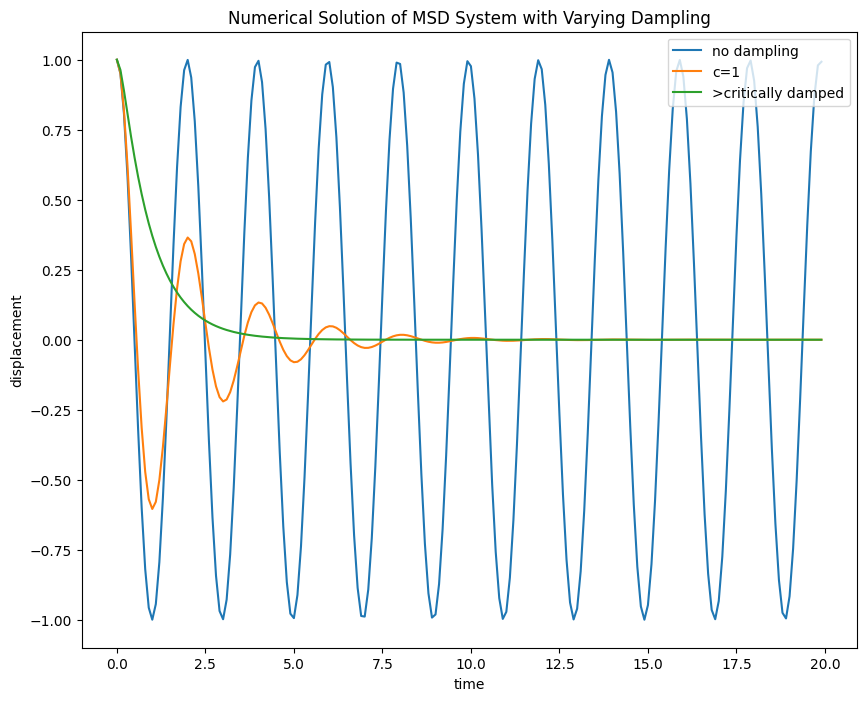

In [7]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0,k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
f = partial(my_msd, m=m, c=1,k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
f = partial(my_msd, m=m, c=10,k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", ">critically damped"], loc=1)

$\underline{\text{This is the \textbf{END} of the Exercise.}}$